long when closing price is > 70 RSA
short when closing price is < 30 RSA

In [4]:
import nsepy as nse
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd
import numpy as np
import ta
from ta import *


template to bring data from nse

name of stock :INFY


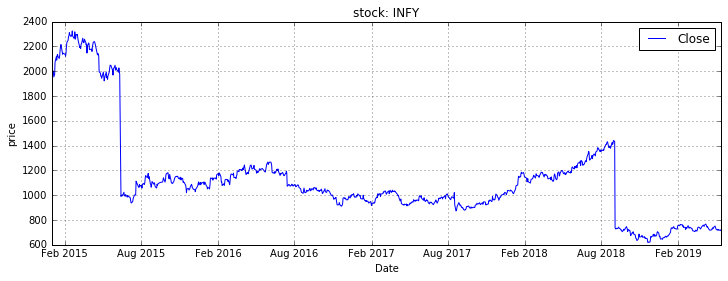

In [6]:

tick=str(raw_input('name of stock :')).upper()
STD=date(2015,1,1)
END=date(2019,5,15)
d=nse.get_history(str(tick),STD,END)
dt=pd.DataFrame(d)

p=dt.Close
p.head()

plt.figure(figsize=(12,4))
plt.xlabel('time')
plt.ylabel('price')

p.plot(color='blue')
plt.legend()
plt.title('stock: {}'.format(tick))
plt.grid()
plt.show()

In [7]:
rsi=ta.rsi(p)

In [8]:
buyprice=0.0
sellprice=0.0
cash =1
stock =0
#sma=200
mawealth =1.0

buy_data=[]
sell_data=[]
trade_price=[]
wealth=[]
used=dt.Close

#MA=used.rolling(window=sma,center=False).mean()
N=len(used)


In [9]:
for x in range(15,N):
    if rsi[x]< 30 and cash==1:
        buyprice=used[x]
    
        buy_data.append(buyprice)
        trade_price.append(buyprice)
        cash=0.0
        stock = 1
    elif rsi[x] < 70 and stock ==1:
        sellprice=used[x]
        
        sell_data.append(sellprice)
        trade_price.append(sellprice)
        stock = 0
        cash=1
        mawealth = mawealth*(sellprice/buyprice)
        wealth.append(mawealth)
w=pd.DataFrame(wealth)
wealth


[1.025997623873087,
 0.9646891890441014,
 0.9531449025251699,
 0.9439592519335651,
 0.9243851128156458,
 0.9326914659925445,
 0.9385459619877774,
 0.9654194837807666,
 0.9603048063876858,
 0.9746543557183311,
 0.9689451245279396,
 0.9598132976073834,
 0.9530287948473595,
 0.9306731984358457,
 0.9301771039803894,
 0.9508335654801381,
 0.934373106607264,
 0.9598393540226383,
 0.9777161519506031,
 0.9831547065435698,
 0.9790910557109561,
 0.9741993314085641,
 0.9890751698815239,
 0.9977435830994498,
 0.9942095541239375,
 0.9873507142515203,
 0.9978324371573893,
 0.9802816669658969,
 0.9782701450774579,
 1.0015840822588795,
 1.0187956402375518,
 1.0234938456962914,
 1.0148048282584734,
 1.0191606642591693,
 0.9990603443650878,
 1.0012285617040604,
 0.9906757117312708,
 0.9940464665401467,
 0.9999368764155446,
 1.020824567916344,
 1.0245657292928132,
 0.9951820756026367,
 0.9969313487541897,
 0.9899740223993451,
 0.9862722824358945,
 0.982443337955393,
 0.9854122455656408,
 0.99726844977807

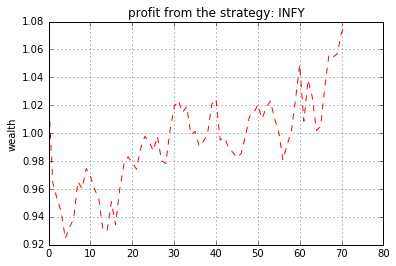

In [10]:
plt.plot(w,'r--')
plt.ylabel('wealth')
plt.title('profit from the strategy: {}'.format(tick))
plt.grid()